In [3]:
from uk_covid19 import Cov19API
import json

In [4]:
filters = [
    "areaType=overview"
]

In [5]:
structure = {
    "date": "date",
    "beds": "covidOccupiedMVBeds",
    "cases": "newCasesByPublishDate",
    "firstDose": "newPeopleVaccinatedFirstDoseByPublishDate",
    "secondDose": "newPeopleVaccinatedSecondDoseByPublishDate"
}

In [6]:
api = Cov19API(filters=filters, structure=structure)

In [7]:
beds=api.get_json()

In [9]:
import json

In [10]:
with open("beds.json", "wt") as OUTF:
    json.dump(beds, OUTF)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [12]:
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [13]:
with open("beds.json", "rt") as INFILE:
    jsondata=json.load(INFILE)

In [16]:
datalist=jsondata['data']

In [18]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

In [19]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [20]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

2020-01-31 00:00:00  to  2021-11-29 00:00:00


In [22]:
index=pd.date_range(startdate, enddate, freq='D')
bedsDataFrame=pd.DataFrame(index=index, columns=['beds', 'cases', 'firstDose', 'secondDose'])

In [24]:
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['beds', 'cases', 'firstDose', 'secondDose']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(bedsDataFrame.loc[date, column]): 
            # replace None with 0 in our data 
            value=float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            bedsDataFrame.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
bedsDataFrame.fillna(0.0, inplace=True)

<AxesSubplot:>

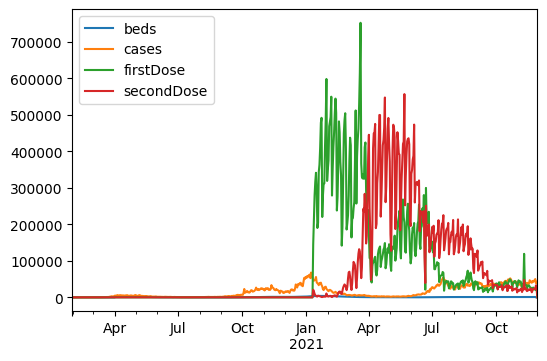

In [44]:
bedsDataFrame.plot()

<AxesSubplot:>

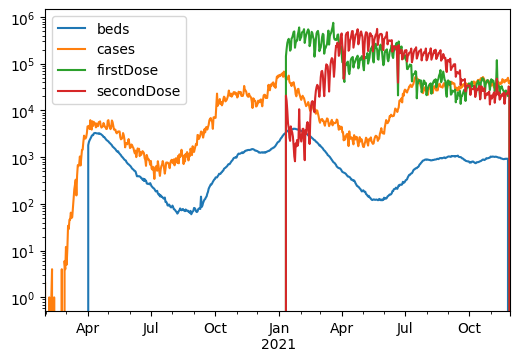

In [26]:
bedsDataFrame.plot(logy=True)

In [27]:
bedsDataFrame.to_pickle("bedsPickle.pkl")

In [28]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [36]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    beds=api.get_json()
    with open("beds.json", "wt") as OUTF:
        json.dump(beds, OUTF)
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon='check'
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to refresh current Public Health England data',
    icon='sync' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(description='Refresh data', icon='sync', style=ButtonStyle(), tooltip='Click to refresh current Public …

In [50]:
date_slider = wdg.SelectionRangeSlider(
    options = dates,
    index = (0, 11),
    description = 'Months',
    disable = False
)
display(date_slider)

SelectionRangeSlider(description='Months', index=(0, 11), options=('2020-01-31', '2020-02-01', '2020-02-02', '…